## Machine Learning: Regression Algorithm-Power Plant Output

#### Regression algorithms is a Supervised Learning algorithms. Regression algorithms are used to predict the continuous values such as price, salary, age, Market Trends, etc. The task of the regression algorithm is to map the input value (x) with the continuous output variable(y). We try to find the best fit line, which can predict the output more accurately. The regression Algorithm can be further divided into Linear and Non-linear Regression.

#### Regression Algorithm we test on this data:
    - Simple Linear Regression
    - Multiple Linear Regression
    - Polynomial Regression
    - Support Vector Regression
    - Decision Tree Regression
    - Random Forest Regression
    - XGBoost

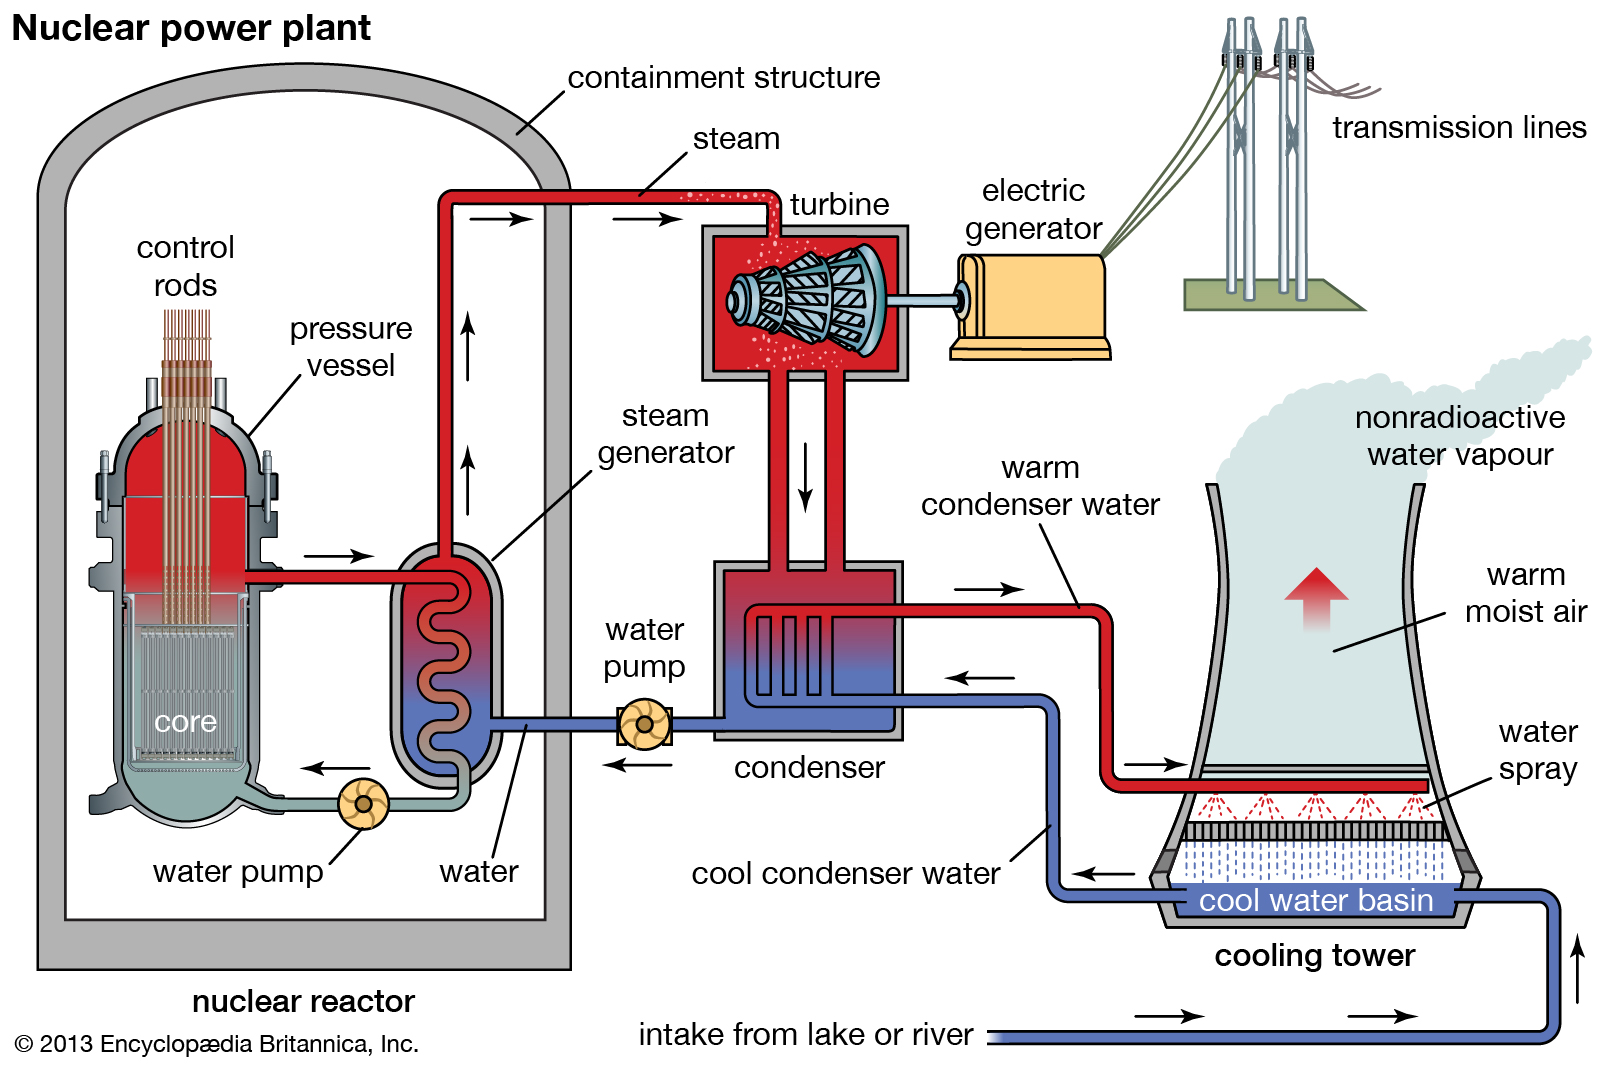

## Problem Analysis

#### The dataset is from the UCI machine learning repository. It is called Combined Cycle Power Plant. In here we are trying to predict this dependent variable, which is the energy output(PE) using the 4 independent features, Engine Temperature(AT), Exhaust Vacuum(V), Ambient Pressure(AP) and Relative Humidity(RH). In this problem, We will use Machine Learning Algorithms, Deep Learning and XGBoost to train the data to understand the correlation between the 4 independent features and energy output(PE) and be able to predict the Energy output based on Engine Temperature(AT), Exhaust Vacuum(V), Ambient Pressure(AP) and Relative Humidity(RH). We use the above mention algorithm and pick the best 2 Regression algorithm based on highest r2_score. We then tune there parameters to see if we can still increase there performance.

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
powerplant = pd.read_csv('powerplant.csv')
X = powerplant.iloc[:, :-1].values
y = powerplant.iloc[:, -1].values

In [3]:
powerplant.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [4]:
powerplant.describe()

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


In [5]:
powerplant.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


#### There is no missing value, so we proceed to splitting and training the data 

## Splitting the dataset into the Training set and Test set

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## 1. Training the Multiple Linear Regression model on the Training set

In [7]:
from sklearn.linear_model import LinearRegression
regressor_LR = LinearRegression()
regressor_LR.fit(X_train, y_train)

LinearRegression()

### Predicting the Test set results

In [8]:
y_pred_LR = regressor_LR.predict(X_test)
df_val_lr = pd.DataFrame({'Predicted Values': y_pred_LR.round(2), 'Real Values':  y_test})
df_val_lr

,Predicted Values,Real Values
0,431.43,431.23
1,458.56,460.01
2,462.75,461.14
3,448.60,445.90
4,457.87,451.29
...,...,...
1909,463.63,460.29
1910,457.04,452.42
1911,469.52,473.26
1912,442.42,438.00


#### We can see that our predicted values is near the real values w/c shows a good prediction.

### Evaluating the Model Performance

In [9]:
from sklearn.metrics import explained_variance_score, mean_absolute_error, r2_score
print('r2_score: {:.4f}'.format(r2_score(y_test, y_pred_LR)))
print('explained_variance_score: {:.4f}'.format(explained_variance_score(y_test, y_pred_LR)))
print('mean_absolute_error: {:.3f}'.format(mean_absolute_error(y_test, y_pred_LR)))

r2_score: 0.9325
explained_variance_score: 0.9325
mean_absolute_error: 3.567


#### Linear Regression Model R-2 score is 93.25%. R squared closer to 1 implies a better model and less error. Mean Absolute Error (MSE) is 3.567, the lower the value of MSE the better the model.

### Applying k-Fold Cross Validation

In [10]:
from sklearn.model_selection import cross_val_score
r2_K_FOLD_LR = cross_val_score(estimator = regressor_LR, X = X_train, y = y_train, cv = 5)
print("CROSS-VAL-R2: ",(r2_K_FOLD_LR))
print("AVERAGE-R2-ERROR: {:.2f} %".format(r2_K_FOLD_LR.mean()*100))
print("STANDARD DEVIATION: {:.2f}".format(r2_K_FOLD_LR.std()*100))

CROSS-VAL-R2:  [0.92889236 0.92964202 0.92601467 0.9306198  0.92210588]
AVERAGE-R2-ERROR: 92.75 %
STANDARD DEVIATION: 0.31


#### As shown above, the Cross Validation randomly split the data into 5 approximately equal size and R_2 score in each set is calculated. We can see that Multiple Linear Regression model perform well on each of the 5 divided dataset. The R2_score values are near each other, each R_2 score value is plus or minus 0.31 of the average R2_score of 92.75%. There is no overfitting noted, model overfits the data when it will give high performance score on training data and low score on test set or unseen data. In Multiple Linear Regression model, the value of R2_score 93.25%(whole data) and R2_score of 5 divided dataset are near each other. In the range of 92-93% w/c perform well, this helps us assess how well our model generalizes/perform on new datasets or unseen data.

## 2. Training the Polynomial Regression model on the Training set

In [11]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X_train)
regressor_poly = LinearRegression()
regressor_poly.fit(X_poly, y_train)

LinearRegression()

### Predicting the Test set results

In [12]:
y_pred_poly = regressor_poly.predict(poly_reg.transform(X_test))
df_val_poly = pd.DataFrame({'Predicted Values': y_pred_poly.round(2), 'Real Values':  y_test})
df_val_poly

,Predicted Values,Real Values
0,433.94,431.23
1,457.90,460.01
2,460.52,461.14
3,447.57,445.90
4,457.22,451.29
...,...,...
1909,463.47,460.29
1910,455.98,452.42
1911,469.53,473.26
1912,438.27,438.00


#### We can see that our predicted values is near the real values w/c shows a good prediction.

### Evaluating the Model Performance

In [13]:
from sklearn.metrics import explained_variance_score,mean_absolute_error,r2_score
print('r2_score: {:.4f}'.format(r2_score(y_test, y_pred_poly)))
print('explained_variance_score: {:.4f}'.format(explained_variance_score(y_test, y_pred_poly)))
print('mean_absolute_error: {:.3f}'.format(mean_absolute_error(y_test, y_pred_poly)))

r2_score: 0.9458
explained_variance_score: 0.9458
mean_absolute_error: 3.136


#### Polynomial Regression model R-2 score is 94.58%. R squared closer to 1 implies a better model and less error. Mean Absolute Error (MSE) is 3.136, the lower the value of MSE the better the model.

### Applying k-Fold Cross Validation

In [14]:
from sklearn.model_selection import cross_val_score
r2_K_FOLD_POLY = cross_val_score(estimator = regressor_poly, X = poly_reg.transform(X_train), y = y_train, cv = 5)
print("CROSS-VAL-R2: ",(r2_K_FOLD_POLY))
print("AVERAGE-R2-ERROR: {:.2f} %".format(r2_K_FOLD_POLY.mean()*100))
print("STANDARD DEVIATION: {:.2f}".format(r2_K_FOLD_POLY.std()*100))

CROSS-VAL-R2:  [0.94417544 0.94251246 0.93942987 0.94186646 0.93500404]
AVERAGE-R2-ERROR: 94.06 %
STANDARD DEVIATION: 0.32


#### As shown above, the Cross Validation randomly split the data into 5 approximately equal size and R_2 score in each set is calculated. We can see that Polynomial Regression model perform well on each of the 5 divided dataset. The R2_score values are near each other, each R_2 score value is plus or minus 0.32 of the average R2_score of 94.06%. There is no overfitting noted, model overfits the data when it will give high performance score on training data and low score on test set or unseen data. In Polynomial Regression model, the value of R2_score 94.58%(whole data) and R2_score of 5 divided dataset are near each other. In the range of 94-95% w/c perform well, this helps us assess how well our model generalizes/perform on new datasets or unseen data.

## 3. Training the Decision Tree Regression model on the Training set

In [15]:
from sklearn.tree import DecisionTreeRegressor
regressor_DT = DecisionTreeRegressor(random_state = 0)
regressor_DT.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

### Predicting the Test set results

In [16]:
y_pred_DT = regressor_DT.predict(X_test)
df_val_DT = pd.DataFrame({'Predicted Values': y_pred_DT.round(2), 'Real Values':  y_test})
df_val_DT

,Predicted Values,Real Values
0,431.28,431.23
1,459.59,460.01
2,460.06,461.14
3,452.71,445.90
4,459.61,451.29
...,...,...
1909,460.47,460.29
1910,454.88,452.42
1911,471.46,473.26
1912,437.76,438.00


#### We can see that our predicted values is near the real values w/c shows a good prediction.

### Evaluating the Model Performance

In [17]:
from sklearn.metrics import explained_variance_score, mean_absolute_error, r2_score
print('r2_score: {:.4f}'.format(r2_score(y_test, y_pred_DT)))
print('explained_variance_score: {:.4f}'.format(explained_variance_score(y_test, y_pred_DT)))
print('mean_absolute_error: {:.3f}'.format(mean_absolute_error(y_test, y_pred_DT)))

r2_score: 0.9229
explained_variance_score: 0.9229
mean_absolute_error: 3.104


#### Decision Tree Regression model R-2 score is 92.29%. R squared closer to 1 implies a better model and less error. Mean Absolute Error (MSE) is 3.104, the lower the value of MSE the better the model.

### Applying k-Fold Cross Validation

In [18]:
from sklearn.model_selection import cross_val_score
r2_K_FOLD_DT = cross_val_score(estimator = regressor_DT, X = X_train, y = y_train, cv = 5)
print("CROSS-VAL-R2: ",(r2_K_FOLD_LR))
print("AVERAGE-R2-ERROR: {:.2f} %".format(r2_K_FOLD_DT.mean()*100))
print("STANDARD DEVIATION: {:.2f}".format(r2_K_FOLD_DT.std()*100))

CROSS-VAL-R2:  [0.92889236 0.92964202 0.92601467 0.9306198  0.92210588]
AVERAGE-R2-ERROR: 92.42 %
STANDARD DEVIATION: 0.62


#### As shown above, the Cross Validation randomly split the data into 5 approximately equal size and R_2 score in each set is calculated. We can see that Decision Tree Regression perform well on each of the 5 divided dataset. The R2_score values are near each other, each R_2 score value is plus or minus 0.62 of the average R2_score of 92.42%. There is no overfitting noted, model overfits the data when it will give higher performance score on training data and low score on test set or unseen data. In Decision Tree Regression, the value of R2_score 92.29%(whole data) and R2_score of 5 divided dataset are near each other. In the range of 92-93% w/c perform well, this helps us assess how well our model generalizes/perform on new datasets or unseen data.

## 4. Training the Random Forest Regression model on the whole dataset

In [19]:
from sklearn.ensemble import RandomForestRegressor
regressor_RF = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor_RF.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

### Predicting the Test set results

In [20]:
y_pred_RF = regressor_RF.predict(X_test)
df_val_rf = pd.DataFrame({'Predicted Values': y_pred_RF.round(2), 'Real Values':  y_test})
df_val_rf

,Predicted Values,Real Values
0,434.05,431.23
1,458.78,460.01
2,463.02,461.14
3,446.38,445.90
4,459.46,451.29
...,...,...
1909,460.84,460.29
1910,453.76,452.42
1911,469.48,473.26
1912,439.57,438.00


#### We can see that our predicted values is near the real values w/c shows a good prediction.

### Evaluating the Model Performance

In [21]:
from sklearn.metrics import explained_variance_score, mean_absolute_error, r2_score
print('r2_score: {:.4f}'.format(r2_score(y_test, y_pred_RF)))
print('explained_variance_score: {:.4f}'.format(explained_variance_score(y_test, y_pred_RF)))
print('mean_absolute_error: {:.3f}'.format(mean_absolute_error(y_test, y_pred_RF)))

r2_score: 0.9616
explained_variance_score: 0.9616
mean_absolute_error: 2.452


#### Random Forest Regression model R-2 score is 96.16%. R squared closer to 1 implies a better model and less error. Mean Absolute Error (MSE) is 2.452, the lower the value of MSE the better the model.

### Applying k-Fold Cross Validation


In [22]:
from sklearn.model_selection import cross_val_score
r2_K_FOLD_RF = cross_val_score(estimator = regressor_RF, X = X_train, y = y_train, cv = 5)
print("CROSS-VAL-R2: ",(r2_K_FOLD_RF))
print("AVERAGE-R2-ERROR: {:.2f} %".format(r2_K_FOLD_RF.mean()*100))
print("STANDARD DEVIATION: {:.2f}".format(r2_K_FOLD_RF.std()*100))

CROSS-VAL-R2:  [0.95509612 0.95736629 0.9534166  0.95735835 0.95103652]
AVERAGE-R2-ERROR: 95.49 %
STANDARD DEVIATION: 0.24


#### As shown above, the Cross Validation randomly split the data into 5 approximately equal size and R_2 score in each set is calculated. We can see that Random Forest Regression perform well on each of the 5 divided dataset. The R2_score values are near each other, each R_2 score value is plus or minus 0.24 of the average R2_score of 95.49%. There is no overfitting noted, model overfits the data when it will give higher performance score on training data and low score on test set or unseen data. In Random Forest Regression, the value of R2_score 96.16%(whole data) and R2_score of 5 divided dataset are near each other. In the range of 95-96% w/c perform well, this helps us assess how well our model generalizes/perform on new datasets or unseen data.

## 5. Training the SVR model on the Training set

### Feature Scaling

In [23]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train_sc = sc_X.fit_transform(X_train)
y_train_sc = sc_y.fit_transform(y_train.reshape(-1,1))

### Training the SVR model on the Training set

In [24]:
from sklearn.svm import SVR
regressor_svr = SVR(kernel = 'rbf')
regressor_svr.fit(X_train_sc, y_train_sc.ravel())

SVR()

### Predicting the Test set results

In [25]:
y_pred_svr = sc_y.inverse_transform((regressor_svr.predict(sc_X.transform(X_test))).reshape(-1,1))
df_val_svr = pd.DataFrame({'Predicted Values': y_pred_svr.ravel().round(2), 'Real Values':  y_test})
df_val_svr

,Predicted Values,Real Values
0,434.05,431.23
1,457.94,460.01
2,461.03,461.14
3,448.63,445.90
4,457.83,451.29
...,...,...
1909,462.64,460.29
1910,455.35,452.42
1911,470.60,473.26
1912,439.42,438.00


#### We can see that our predicted values is near the real values w/c shows a good prediction.

### Evaluating the Model Performance

In [26]:
from sklearn.metrics import explained_variance_score,mean_absolute_error,r2_score
print('r2_score: {:.4f}'.format(r2_score(y_test, y_pred_svr)))
print('explained_variance_score: {:.4f}'.format(explained_variance_score(y_test, y_pred_svr)))
print('mean_absolute_error: {:.3f}'.format(mean_absolute_error(y_test, y_pred_svr)))

r2_score: 0.9481
explained_variance_score: 0.9482
mean_absolute_error: 2.995


#### SVR model R-2 score is 94.81%. R squared closer to 1 implies a better model and less error. Mean Absolute Error (MSE) is 2.995, the lower the value of MSE the better the model.

### Applying k-Fold Cross Validation

In [27]:
from sklearn.model_selection import cross_val_score
r2_K_FOLD_svr = cross_val_score(estimator = regressor_svr, X = X_train_sc , y = y_train_sc.ravel(), cv = 5)
print("CROSS-VAL-R2: ",(r2_K_FOLD_svr))
print("AVERAGE-R2-ERROR: {:.2f} %".format(r2_K_FOLD_svr.mean()*100))
print("STANDARD DEVIATION: {:.2f}".format(r2_K_FOLD_svr.std()*100))

CROSS-VAL-R2:  [0.94646891 0.94583516 0.94216819 0.94409196 0.93702414]
AVERAGE-R2-ERROR: 94.31 %
STANDARD DEVIATION: 0.34


#### As shown above, the Cross Validation randomly split the data into 5 approximately equal size and R_2 score in each set is calculated. We can see that Support Vector Regression model perform well on each of the 5 divided dataset. The R2_score values are near each other, each R_2 score value is plus or minus 0.34 of the average R2_score of 94.31%. There is no overfitting noted, model overfits the data when it will give high performance score on training data and low score on test set or unseen data. In Support Vector Regression model, the value of R2_score 94.82%(whole data) and R2_score of 5 divided dataset are near each other. In the range of 94-95% w/c perform well, this helps us assess how well our model generalizes/perform on new datasets or unseen data.

## 6.  Training XGBoost on the Training set

In [28]:
from xgboost import XGBRegressor
xgbregressor = XGBRegressor(objective='reg:squarederror')
xgbregressor.fit(X_train, y_train)

XGBRegressor(objective='reg:squarederror')

## Predicting the Test set results

In [29]:
y_pred_xgb = xgbregressor.predict(X_test)
df_val_xgb = pd.DataFrame({'Predicted Values': y_pred_xgb.round(2), 'Real Values':  y_test})
df_val_xgb

,Predicted Values,Real Values
0,434.279999,431.23
1,456.980011,460.01
2,462.510010,461.14
3,448.609985,445.90
4,456.739990,451.29
...,...,...
1909,463.480011,460.29
1910,455.480011,452.42
1911,470.140015,473.26
1912,439.609985,438.00


#### We can see that our predicted values is near the real values w/c shows a good prediction.

### Evaluating the Model Performance

In [30]:
from sklearn.metrics import explained_variance_score,mean_absolute_error,r2_score
print('r2_score: {:.4f}'.format(r2_score(y_test, y_pred_xgb)))
print('explained_variance_score: {:.4f}'.format(explained_variance_score(y_test, y_pred_xgb)))
print('mean_absolute_error: {:.3f}'.format(mean_absolute_error(y_test, y_pred_xgb)))

r2_score: 0.9513
explained_variance_score: 0.9513
mean_absolute_error: 2.930


#### XGBoost Model R-2 score is 95.13%. R squared closer to 1 implies a better model and less error. Mean Absolute Error (MSE) is 2.930, the lower the value of MSE the better the model.

### Applying k-Fold Cross Validation


In [31]:
from sklearn.model_selection import cross_val_score
r2_K_FOLD_xgb = cross_val_score(estimator = xgbregressor, X = X_train, y = y_train, cv = 5)
print("CROSS-VAL-R2: ",(r2_K_FOLD_xgb))
print("AVERAGE-R2-ERROR: {:.2f} %".format(r2_K_FOLD_xgb.mean()*100))
print("STANDARD DEVIATION: {:.2f}".format(r2_K_FOLD_xgb.std()*100))

CROSS-VAL-R2:  [0.94533676 0.94802451 0.94449743 0.94690509 0.94006073]
AVERAGE-R2-ERROR: 94.50 %
STANDARD DEVIATION: 0.27


#### As shown above, the Cross Validation randomly split the data into 5 approximately equal size and R_2 score in each set is calculated. We can see that XGBoost  model perform well on each of the 5 divided dataset. The R2_score values are near each other, each R_2 score value is plus or minus 0.27 of the average R2_score of 94.50%. There is no overfitting noted, model overfits the data when it will give higher performance score on training data and very lower score on test set or unseen data. In XGBoost  model, the value of R2_score 95.13%(whole data) and R2_score of 5 divided dataset are near each other. In the range of 94-95% w/c perform well, this helps us assess how well our model generalizes/perform on new datasets or unseen data.

## Comparing all the model

### After evaluating different regression models, the result from highest to lowest as follows:
- #### Random Forest regression: R_2 score 96.16% and MSE of 2.452.
- #### XG Boost: R_2 score 95.13% and MSE of 2.913.
- #### Support  Vector Regression(SVR): R_2 score 94.81% and MSE of 2.995.
- #### Polynomial Regression: R_2 score 94.58% and MSE of 3.136.
- #### Multiple Linear Regression Model: R_2 score 93.25% and MSE of 3.567.
- #### Decision Tree Regression Model: R_2 score 92.29% and MSE of 3.104.


## Tuning the parameter of the best 2 model:


## 1. Random Forest Model

In [32]:
from sklearn.model_selection import GridSearchCV
parameters = { 'n_estimators' : (20,40,60,80,100,150,200),
              'criterion' : ['squared_error', 'absolute_error', 'poisson'],
              'max_features' : ['auto', 'sqrt', 'log2']
             }

In [33]:
grid = GridSearchCV(RandomForestRegressor(),parameters)
model = grid.fit(X,y)
print(model.best_params_,'\n')
print(model.best_estimator_,'\n')

{'criterion': 'squared_error', 'max_features': 'sqrt', 'n_estimators': 200} 

RandomForestRegressor(max_features='sqrt', n_estimators=200) 



### After running Gridsearch, the best parameter for Random Forest Algorithm as follows:

{'criterion': 'squared_error', 'max_features': 'sqrt', 'n_estimators': 200} 

RandomForestRegressor(max_features='sqrt', n_estimators=200) 

In [34]:
from sklearn.ensemble import RandomForestRegressor
regressor_RF = RandomForestRegressor(n_estimators = 200, max_features='sqrt' , random_state = 0)
regressor_RF.fit(X_train, y_train)

RandomForestRegressor(max_features='sqrt', n_estimators=200, random_state=0)

In [35]:
y_pred_RF = regressor_RF.predict(X_test)
df_val_rf = pd.DataFrame({'Predicted Values': y_pred_RF.round(2), 'Real Values':  y_test})
df_val_rf

,Predicted Values,Real Values
0,433.63,431.23
1,458.19,460.01
2,464.22,461.14
3,447.00,445.90
4,459.12,451.29
...,...,...
1909,460.74,460.29
1910,453.81,452.42
1911,469.88,473.26
1912,439.05,438.00


#### We can see that our predicted values is near the real values w/c shows a good prediction.

### Evaluating the Model Performance

In [36]:
from sklearn.metrics import explained_variance_score,mean_absolute_error,r2_score
print('r2_score: {:.4f}'.format(r2_score(y_test, y_pred_RF)))
print('explained_variance_score: {:.4f}'.format(explained_variance_score(y_test, y_pred_RF)))
print('mean_absolute_error: {:.3f}'.format(mean_absolute_error(y_test, y_pred_RF)))

r2_score: 0.9673
explained_variance_score: 0.9673
mean_absolute_error: 2.274


### Applying k-Fold Cross Validation


In [37]:
from sklearn.model_selection import cross_val_score
r2_K_FOLD_RF = cross_val_score(estimator = regressor_RF, X = X_train, y = y_train, cv = 5)
print("CROSS-VAL-R2: ",(r2_K_FOLD_RF))
print("AVERAGE-R2-ERROR: {:.2f} %".format(r2_K_FOLD_RF.mean()*100))
print("STANDARD DEVIATION: {:.2f}".format(r2_K_FOLD_RF.std()*100))

CROSS-VAL-R2:  [0.96322741 0.96296395 0.96015531 0.96380211 0.95719874]
AVERAGE-R2-ERROR: 96.15 %
STANDARD DEVIATION: 0.25


#### As shown above, the Cross Validation randomly split the data into 5 approximately equal size and R_2 score in each set is calculated. We can see that Multiple Linear Regression model perform well on each of the 5 divided dataset. The R2_score values are near each other, each R_2 score value is plus or minus 0.31 of the average R2_score of 92.75%. There is no overfitting noted, model overfits the data when it will give higher performance score on training data and very lower score on test set or unseen data. In Multiple Linear Regression model, the value of R2_score 93.25%(whole data) and R2_score of 5 divided dataset are near each other. In the range of 92-93% w/c perform well, this helps us assess how well our model generalizes/perform on new datasets or unseen data.

#### Random forest parameter tuning has has little increase to the accuracy from 96.15% to 96.72%. 

## 2. XGBRegressor

In [38]:
from sklearn.model_selection import GridSearchCV
parameters = { 'n_estimators' : [100, 400, 800],
              'learning_rate' : [0.05,0.1, 0.20,0.50],
              'max_depth' : [1,3,5,8]
             }

In [39]:
grid = GridSearchCV(xgbregressor,parameters)
model = grid.fit(X,y)
print(model.best_params_,'\n')
print(model.best_estimator_,'\n')

{'learning_rate': 0.05, 'max_depth': 8, 'n_estimators': 800} 

XGBRegressor(learning_rate=0.05, max_depth=8, n_estimators=800,
             objective='reg:squarederror') 



### After running Gridsearch, the best parameter for XGBRegressor as follows:

####  {'learning_rate': 0.05, 'max_depth': 8, 'n_estimators': 800} 



In [40]:
from xgboost import XGBRegressor
xgbregressor = XGBRegressor(learning_rate=0.05, max_depth=8, n_estimators=800,
             objective='reg:squarederror') 
xgbregressor.fit(X_train, y_train)

XGBRegressor(learning_rate=0.05, max_depth=8, n_estimators=800,
             objective='reg:squarederror')

In [41]:
y_pred_xgb = xgbregressor.predict(X_test)
df_val_xgb = pd.DataFrame({'Predicted Values': y_pred_xgb.round(2), 'Real Values':  y_test.round(2)})
df_val_xgb

,Predicted Values,Real Values
0,434.739990,431.23
1,458.709991,460.01
2,462.950012,461.14
3,446.820007,445.90
4,459.209991,451.29
...,...,...
1909,459.809998,460.29
1910,454.429993,452.42
1911,471.260010,473.26
1912,439.079987,438.00


#### We can see that our predicted values is near the real values w/c shows a good prediction.

### Evaluating the Model Performance

In [42]:
from sklearn.metrics import explained_variance_score,mean_absolute_error,r2_score
print('r2_score: {:.4f}'.format(r2_score(y_test, y_pred_xgb)))
print('explained_variance_score: {:.4f}'.format(explained_variance_score(y_test, y_pred_xgb)))
print('mean_absolute_error: {:.3f}'.format(mean_absolute_error(y_test, y_pred_xgb)))

r2_score: 0.9723
explained_variance_score: 0.9723
mean_absolute_error: 2.024


### Applying k-Fold Cross Validation

In [43]:
from sklearn.model_selection import cross_val_score
r2_K_FOLD_xgb = cross_val_score(estimator = xgbregressor, X= X_train, y = y_train, cv = 5)
print("CROSS-VAL-R2: ",(r2_K_FOLD_xgb))
print("AVERAGE-R2-ERROR: {:.2f} %".format(r2_K_FOLD_xgb.mean()*100))
print("STANDARD DEVIATION: {:.2f}".format(r2_K_FOLD_xgb.std()*100))

CROSS-VAL-R2:  [0.96844113 0.96778404 0.96636074 0.96882233 0.96285992]
AVERAGE-R2-ERROR: 96.69 %
STANDARD DEVIATION: 0.22


#### As shown above, the Cross Validation randomly split the data into 5 approximately equal size and R_2 score in each set is calculated. We can see that XGBoost Algorithm perform well on each of the 5 divided dataset. The R2_score values are near each other, each R_2 score value is plus or minus 0.22 of the average R2_score of 96.69%. There is no overfitting noted, model overfits the data when it will give higher performance score on training data and very lower score on test set or unseen data. In XGBoost Algorithm, the value of R2_score 97.23%(whole data) and R2_score of 5 divided dataset are near each other. In the range of 96-97% w/c perform well, this helps us assess how well our model generalizes/perform on new datasets or unseen data.

#### XGBoost Algorithm tuning result, the r2_score increase from 95.12 % to 97.23 % which beat the r2_score of Random Forest Algorithm 96.7%. 

## CONCLUSION:
    

#### After individually training the data to each of the regression models and tuning the best 2 model, XGBoost Algorithm increase from 95.12 % to 97.23 %. We can conclude that the best model to used in this particular dataset is the XGBoost Algorithm. We should be careful also in parameter tuning because it might cause overfitting. But observed during the cross validation, there is no overfitting noted. We will train Deep Learning(Artificial Neural Network) to the powerplant data in the other jupyter notebook to see if ANN perform better than XGBRegressor.